# Binary tree basics

In [1]:
import matplotlib.pyplot as plt
from dtreeviz.trees import *
from lolviz import *

import numpy as np
import pandas as pd

## Binary tree class definition

In [2]:
class TreeNode:
  def __init__(self, value, left=None, right=None):
    self.value = value
    self.left = left
    self.right = right

## Manual tree construction

Hook nodes together.

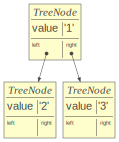

In [3]:
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
treeviz(root)

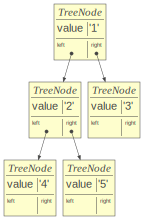

In [4]:
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
treeviz(root)

## Recursion detour

In [6]:
def fact(n):
    if n==0: return 1
    return n * fact(n-1)

In [9]:
fact(0), fact(1), fact(5), fact(8)

(1, 1, 120, 40320)

### Template for building recursive functions:

<i>
def f(input):<br>
&nbsp;&nbsp;  1. check termination condition<br>
&nbsp;&nbsp;  2. process the active input region, current node, etc...<br>
&nbsp;&nbsp;  3. invoke f on subregion(s), children, etc...<br>
&nbsp;&nbsp;  4. combine and return results
</i>    

## Recursive tree walk

Template for building recursive functions:

<i>
def f(input):<br>
&nbsp;&nbsp;  1. check termination condition<br>
&nbsp;&nbsp;  2. process current node<br>
&nbsp;&nbsp;  3. invoke f on left, right child<br>
</i>    

In [5]:
def walk_tree(p:TreeNode) -> None:
    if p is None: return
    print(p.value) # "visit" node in preorder traversal position
    walk_tree(p.left)
    walk_tree(p.right)